In [ ]:
import requests
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import os
import json
from tqdm import tqdm
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import re
import numpy as np

In [ ]:
def read_from_json(input_file):
    with open(input_file, 'r') as file:
        data = json.load(file)
    return data
def convert_to_lowercase(string_list):
    return [s.lower() for s in string_list]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Zero_Shot_Legal/Paheli'

/content/drive/MyDrive/Zero_Shot_Legal/Paheli


# Sentence Level

## Random Guess

In [ ]:
sentence_documents = read_from_json('paheli_sentence_label_dicts.json')

In [ ]:
true_labels = []
for item in sentence_documents:
  true_labels.append(item['label'])

unique_classes = np.unique(true_labels)
num_classes = len(unique_classes)


In [ ]:
label_to_int = {label: i for i, label in enumerate(unique_classes)}
int_to_label = {i: label for label, i in label_to_int.items()}
true_labels_int = np.array([label_to_int[label] for label in true_labels])
class_probabilities = [1/num_classes] * num_classes

In [ ]:
random_predictions_int = np.random.choice(num_classes, size=len(true_labels_int), p=class_probabilities)

random_predictions = np.array([int_to_label[pred] for pred in random_predictions_int])


In [ ]:
report = classification_report(true_labels, random_predictions)
conf_matrix = confusion_matrix(true_labels, random_predictions)
f1_micro = f1_score(true_labels, random_predictions, average='micro')
f1_macro = f1_score(true_labels, random_predictions, average='macro')

In [ ]:
print(f"F1_Micro: {f1_micro}")
print(f"F1_Macro: {f1_macro}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

F1_Micro: 0.14125799573560768
F1_Macro: 0.11706625535241375
Classification Report:
                         precision    recall  f1-score   support

               Argument       0.10      0.16      0.12       845
                  Facts       0.24      0.14      0.17      2219
              Precedent       0.14      0.12      0.13      1468
  Ratio of the decision       0.40      0.15      0.22      3624
  Ruling by Lower Court       0.03      0.13      0.05       316
Ruling by Present Court       0.03      0.13      0.04       262
                Statute       0.06      0.13      0.09       646

               accuracy                           0.14      9380
              macro avg       0.14      0.14      0.12      9380
           weighted avg       0.25      0.14      0.17      9380

Confusion Matrix:
[[131 116 114 126 121 119 118]
 [337 306 326 317 321 290 322]
 [223 213 182 194 239 207 210]
 [487 485 525 546 549 517 515]
 [ 44  42  59  44  41  48  38]
 [ 35  34  35  40  40  34 

## 3.5 Turbo

In [ ]:
prediction_output_file_name = "gpt-3.5-turbo" + "paheli_output_predictions.json"

In [ ]:
prediction_output_file = read_from_json(prediction_output_file_name)

In [ ]:
true_labels = [entry['label'] for entry in prediction_output_file]
pred_labels = [entry['pred_label'] for entry in prediction_output_file]

desired_labels = ["Facts", "Ruling by Lower Court", "Argument", "Statute", "Precedent", "Ratio of the decision", "Ruling by Present Court"]

# Function to clean up label names
def clean_label(label):
    # Remove unwanted characters and strip leading/trailing whitespace
    cleaned_label = re.sub(r'[^a-zA-Z\s]', '', label).strip()

    # Correct common variations
    for desired_label in desired_labels:
        if cleaned_label.lower() in desired_label:
            return desired_label
    return cleaned_label

cleaned_labels = [clean_label(label) for label in pred_labels]

#to lower case:
true_labels = convert_to_lowercase(true_labels)
cleaned_labels = convert_to_lowercase(cleaned_labels)

report = classification_report(true_labels, cleaned_labels)
conf_matrix = confusion_matrix(true_labels, cleaned_labels)
f1_micro = f1_score(true_labels, cleaned_labels, average='micro')
f1_macro = f1_score(true_labels, cleaned_labels, average='macro')

print(f"F1_Micro: {f1_micro}")
print(f"F1_Macro: {f1_macro}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1_Micro: 0.3760782058654399
F1_Macro: 0.0629280068926704


## GPT 4 Turbo

In [ ]:
prediction_output_file_name = "gpt-4-turbo" + "paheli_output_predictions.json"
prediction_output_file = read_from_json(prediction_output_file_name)

In [ ]:
true_labels = [entry['label'] for entry in prediction_output_file]
pred_labels = [entry['pred_label'] for entry in prediction_output_file]

desired_labels = ["Facts", "Ruling by Lower Court", "Argument", "Statute", "Precedent", "Ratio of the decision", "Ruling by Present Court"]

# Function to clean up label names
def clean_label(label):
    # Remove unwanted characters and strip leading/trailing whitespace
    cleaned_label = re.sub(r'[^a-zA-Z\s]', '', label).strip()

    # Correct common variations
    for desired_label in desired_labels:
        if cleaned_label.lower() in desired_label:
            return desired_label
    return cleaned_label

cleaned_labels = [clean_label(label) for label in pred_labels]

#to lower case:
true_labels = convert_to_lowercase(true_labels)
cleaned_labels = convert_to_lowercase(cleaned_labels)

# Calculate F1 scores
f1_micro = f1_score(true_labels, cleaned_labels, average='micro')
f1_macro = f1_score(true_labels, cleaned_labels, average='macro')
#accuracy_score = accuracy_score(true_labels, cleaned_labels)

print(f"F1 Micro Score: {f1_micro}")
print(f"F1 Macro Score: {f1_macro}")
#print(f"Accuracy: {accuracy_score}")

F1 Micro Score: 0.3893041978148361
F1 Macro Score: 0.12347928239133932


#Span Level

## 3.5


In [ ]:
prediction_output_file_name = "gpt-3.5-turbo" + "paheli_span_output_predictions.json"
prediction_output_file = read_from_json(prediction_output_file_name)
true_labels = [entry['label'] for entry in prediction_output_file]
pred_labels = [entry['pred_label'] for entry in prediction_output_file]

desired_labels = ["Facts", "Ruling by Lower Court", "Argument", "Statute", "Precedent", "Ratio of the decision", "Ruling by Present Court"]

# Function to clean up label names
def clean_label(label):
    # Remove unwanted characters and strip leading/trailing whitespace
    cleaned_label = re.sub(r'[^a-zA-Z\s]', '', label).strip()

    # Correct common variations
    for desired_label in desired_labels:
        if cleaned_label.lower() in desired_label:
            return desired_label
    return cleaned_label

cleaned_labels = [clean_label(label) for label in pred_labels]

#to lower case:
true_labels = convert_to_lowercase(true_labels)
cleaned_labels = convert_to_lowercase(cleaned_labels)

# Calculate F1 scores
f1_micro = f1_score(true_labels, cleaned_labels, average='micro')
f1_macro = f1_score(true_labels, cleaned_labels, average='macro')
#accuracy_score = accuracy_score(true_labels, cleaned_labels)

print(f"F1 Micro Score: {f1_micro}")
print(f"F1 Macro Score: {f1_macro}")
#print(f"Accuracy: {accuracy_score}")

F1 Micro Score: 0.5
F1 Macro Score: 0.4252825335575369


## 4

In [ ]:
prediction_output_file_name = "gpt-4-turbo" + "paheli_span_output_predictions.json"
prediction_output_file = read_from_json(prediction_output_file_name)
true_labels = [entry['label'] for entry in prediction_output_file]
pred_labels = [entry['pred_label'] for entry in prediction_output_file]

desired_labels = ["Facts", "Ruling by Lower Court", "Argument", "Statute", "Precedent", "Ratio of the decision", "Ruling by Present Court"]

# Function to clean up label names
def clean_label(label):
    # Remove unwanted characters and strip leading/trailing whitespace
    cleaned_label = re.sub(r'[^a-zA-Z\s]', '', label).strip()

    # Correct common variations
    for desired_label in desired_labels:
        if cleaned_label.lower() in desired_label:
            return desired_label
    return cleaned_label

cleaned_labels = [clean_label(label) for label in pred_labels]

#to lower case:
true_labels = convert_to_lowercase(true_labels)
cleaned_labels = convert_to_lowercase(cleaned_labels)

# Calculate F1 scores
f1_micro = f1_score(true_labels, cleaned_labels, average='micro')
f1_macro = f1_score(true_labels, cleaned_labels, average='macro')
#accuracy_score = accuracy_score(true_labels, cleaned_labels)

print(f"F1 Micro Score: {f1_micro}")
print(f"F1 Macro Score: {f1_macro}")
#print(f"Accuracy: {accuracy_score}")

F1 Micro Score: 0.585
F1 Macro Score: 0.3777520033346567


#PLotting

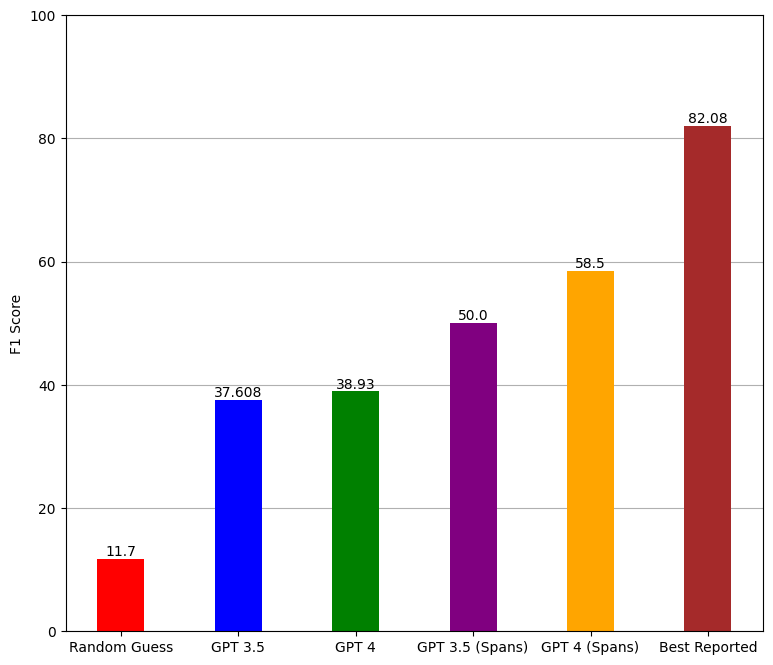

In [ ]:
import matplotlib.pyplot as plt

# Define the data for the bars
heights = [11.70, 37.608, 38.93, 50.0, 58.5, 82.08]
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
models = ("Random Guess", "GPT 3.5", "GPT 4", "GPT 3.5 (Spans)", "GPT 4 (Spans)", 'Best Reported')

fig, ax = plt.subplots(figsize=(9, 8))

# Create the bar plot
bars = plt.bar(models, heights, color=colors, width=0.4, zorder=2)

# Add the heights on the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Add a title and axis labels
plt.ylabel('F1 Score')

plt.ylim(0, 100)
plt.grid(axis='y', zorder=1)

# Show the plot
plt.show()
